# Mathematical Definition of Image Classification Problem


  


Image classification is a task aimed at categorizing images into their respective labels.

![Image and their labels](https://github.com/Tran-Thu-Le/ttl_blog/blob/main/images/image_classification_model.png?raw=true)

This objective is typically addressed using neural networks. In this blog post, we have a dual purpose. Firstly, we will delve into the mathematical modeling of this problem from an optimization perspective. Secondly, we will demonstrate how to implement a custom one-hidden-layer linear neural network using PyTorch. We'll also provide visualizations of the classification results and showcase the evolution of weights before and after training.



## 1. Image Classification Problem 


**Original Problem**


In $k$-class image classification problem (ICP), we are given a training dataset comprising pairs of images and labels, denoted as $(x_i, \ell_i) \in \mathbb R^{d} \times \{1, \ldots, k\}$, where $i=1, \ldots, n$. Here, each image $x_i$ is represented as a 2D array of numbers with a size of $d = d_1 \times d_2$, and label $\ell_i$ is the class of image $x_i$. Notice that by flattening $x_i$, one can consider $x_i$ as a usual column vector in $\mathbb R^d$. The main objective is to determine a label function $F$ that associates each image $x_i$ with its corresponding label $\ell_i$, i.e.

$$\text{Find function } F: \quad F(x_i) \approx \ell_i, \quad \forall i=1, \ldots, n. \tag{ICP1}$$


In the following sections, we will explore how to model the function $F$ and how to deal with e the notion of approximation in equation (ICP1).




**Reformulation**

In the real world, we may not always know how to definitively classify an image $x$ into a specific class. Instead, we might express that $x$ belongs to each class with different probabilities. We will now demonstrate how to reformulate (ICP1) using this probabilistic approach.

Let $E= \{e_1,..., e_k\}$ represent the unit basis vectors in $\mathbb R^k$. Define $S=\{u\in \mathbb R^k: \sum_{j=1}^k u_j=1, u_j\geq 0, \forall j=1,..., k\}$ as the simplex in $\mathbb R^k$. In this context, $S$ represents the space of probability distributions over the labels $\ell_j$, where $j=1,..., k$.


For a given image $x$, let $P(x) \in S$ denote the probabilities associated with each label, where the entry $P(x)_\ell$ stands for the probability that image $x$ belongs to label $\ell$. By doing this, if $P(x) = e_\ell$ if and only if $\ell$ is the label of $x$ with a probability of $1$.

Consequently, we may encode label $\ell_i$ by  vector $e_{\ell_i}\in E$:
$$y_i := e_{\ell_i}$$
Thus, in the following, we will consider the dataset $(x_i, y_i)$ instead of $(x_i, \ell_i)$.

On the other hand, we notice that any function $f: \mathbb R^d \rightarrow \mathbb R^k$ can be normalized to obtain a probability function $P$ as follows:
$$P(x) = \sigma_{SM}(f(x)),$$
where the **softmax** function $\sigma_{SM}: \mathbb R^k \rightarrow S$ is defined by:
$$\sigma_{SM}(u) = \frac{1}{\sum_{j=1}^k e^{u_j} }(e^{u_1}, ...,  e^{u_k}) \in S.$$

Naturally, we can define a label function $F(x)$ as the index with the highest probability in $P(x)$, i.e.:
$$F(x) = \argmax_{j=1,..., k} \sigma_{SM}(f(x))_j.$$

The problem (ICP1) can then be reformulated as follows: Given the dataset $(x_i, y_i)\in \mathbb R^d\times E$, for $i=1,..., n$, our objective is to:
$$\text{Find the function } f: \quad \sigma_{SM}(f(x_i)) \approx y_i, \quad \forall i=1,..., n.\tag{ICP2}$$




**Optimization Approach**

As finding a function $f$ across the space of general functions appears to be infeasible, we constrain $f$ to a set of parametric functions, denoted as $f_\Theta$, where $\Theta$ represents a set of parameters. Achieving a function that satisfies the approximation in (ICP2) involves minimizing a loss function. Essentially, the objective here is to discover a Neural Network (NN), which is a specific parametric function denoted as $f_\Theta$, such that $\Theta$ minimizes the following optimization problem:

$$\min_{\Theta} \quad \frac{1}{n}\sum_{i=1}^n L_{CE}(\,  \sigma_{SM}(f_\Theta(x_i)) \, , \,y_i \,)\tag{ICP3}$$

Recall that $(x_i, y_i) \in \mathbb R^{d} \times E$, for $i=1,...., n$. A commonly used loss function in this classification approach is the **Cross Entropy Loss**, defined as:

$$L_{CE}(u, v)  = - \frac{1}{k}\sum_{i=1}^k v_i \log u_i.$$

Note that (ICP3) is a highly non-convex optimization problem and solving it using iterative methods such as gradient descent is known as the process of training a NN. 




## 2. One-hidden-layer Linear Neural Network

In this example, we will illustrate how to solve this problem using PyTorch by implementing the simplest form of a neural network: a one-hidden-layer linear neural network (without activation functions).

The function $f_\Theta$ is defined as:
$$f_\Theta (x) := \Theta_2 \Theta_1 x.$$

Here, $x \in \mathbb R^d$, $\Theta_1 \in \mathbb R^{m \times d}$, $\Theta_2 \in \mathbb R^{k \times m}$, and $\Theta = (\Theta_1, \Theta_2)$.

We will use MNIST (Modified National Institute of Standards and Technology Database), a widely-used collection of handwritten digit data. MNIST comprises 60,000 training images and 10,000 testing images, each being a grayscale image with dimensions of 28x28 pixels. The main classification task involves assigning each image to one of $k=10$ classes, representing the 10 digits with labels $\{\ell_1, ..., \ell_{10}\} = \{0, ..., 9\}$.

In this case, we have $d=784$, $k=10$, and $m$ can be arbitrarily chosen, referred to as the size of the hidden layer.

The custom implementation of NN is provided below. The full code can be found in [my Github]().

Some optimal weights before training


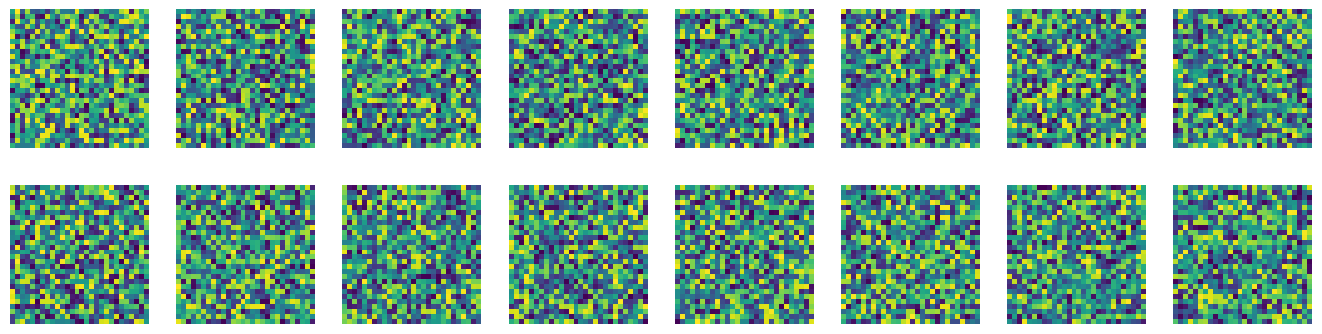

Epoch [1/2], Step [100/600], Loss: 5.3581
Epoch [1/2], Step [200/600], Loss: 2.7070
Epoch [1/2], Step [300/600], Loss: 2.8030
Epoch [1/2], Step [400/600], Loss: 2.1473
Epoch [1/2], Step [500/600], Loss: 2.4654
Epoch [1/2], Step [600/600], Loss: 1.2906
Epoch [2/2], Step [100/600], Loss: 0.5663
Epoch [2/2], Step [200/600], Loss: 1.1328
Epoch [2/2], Step [300/600], Loss: 1.5163
Epoch [2/2], Step [400/600], Loss: 0.8185
Epoch [2/2], Step [500/600], Loss: 0.9148
Epoch [2/2], Step [600/600], Loss: 1.4417
Accuracy of the network on the 10000 test images: 86.85 %


In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 60
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class LinearLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearLayer, self).__init__()
        torch.manual_seed(102)
        rand_weights = 2*(torch.rand(output_size, input_size)-0.5)
        self.weights = nn.Parameter(rand_weights)


    def forward(self, x):
        # x.shape = (m, d)
        # W.shape = (n, d)
        W = self.weights
        result = x @ W.T
        return result

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = LinearLayer(input_size, hidden_size)
        self.l2 = LinearLayer(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# plot weights
model_state_dict = model.state_dict()
W = model_state_dict['l1.weights']

def plot_weights(weights, nrows=2, ncols=8, suptitle=None, predictions=None):
    # print(predictions)
    np.random.seed(103)
    n_images = nrows * ncols
    indices = np.random.choice(range(weights.shape[0]), n_images).reshape(nrows, ncols)
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*2.1, nrows*2.1))
    
    for i in range(nrows):
        for j in range(ncols):
            ax = axs[i, j]
            ax.imshow(weights[indices[i, j]].reshape(28, 28))
            if predictions is  not None:
                ax.set_title(str(predictions[indices[i, j]]))
            ax.axis("off")
    fig.suptitle(suptitle)
    plt.show()

print("Some optimal weights before training")
plot_weights(weights=W, nrows=2, ncols=8)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        flat_images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(flat_images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        # predicted = predicted.numpy()
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')


Some weights after training


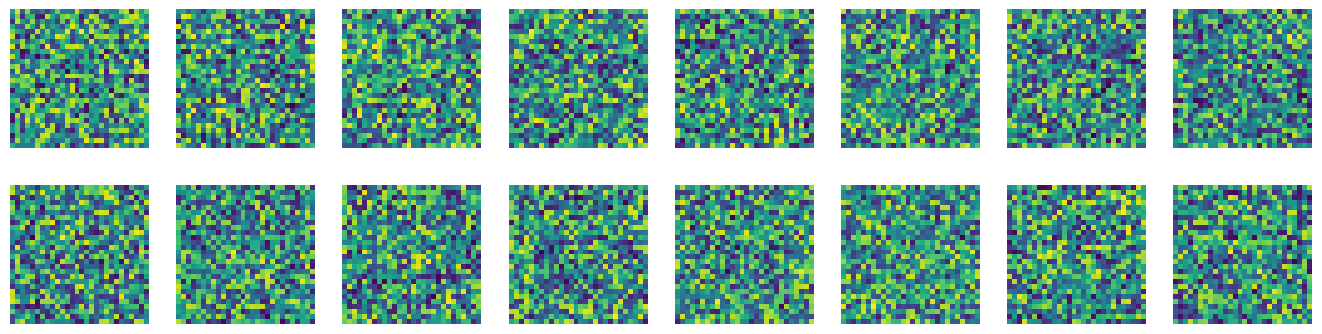

In [2]:
print("Some weights after training")
W = model.state_dict()['l1.weights']
plot_weights(weights=W, nrows=2, ncols=8)

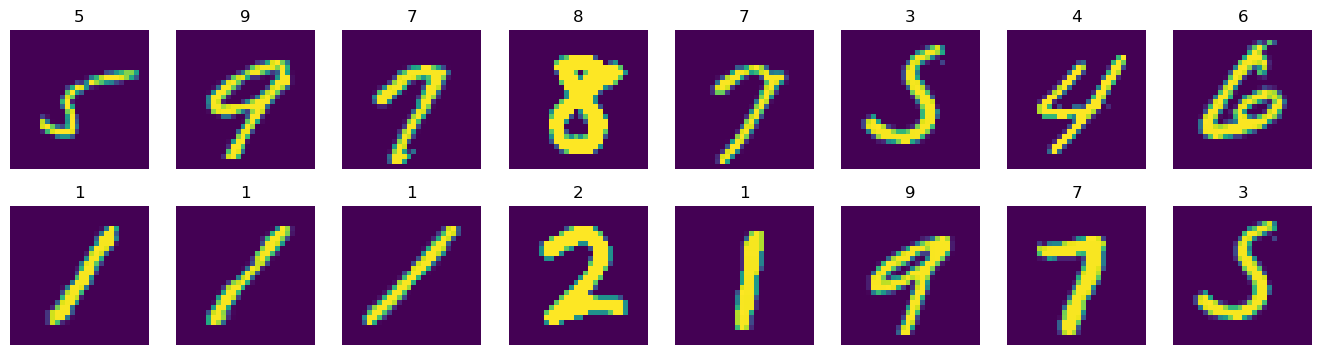

In [3]:
plot_weights(weights=images, nrows=2, ncols=8, suptitle=None, predictions=predicted.numpy())